# Volume 4: Anisotropic Diffusion
    <Name>
    <Class>
    <Date>

In [1]:
import numpy as np
from numpy.random import randint
from matplotlib import cm, pyplot as plt
from imageio.v3 import imread, imwrite
from numpy.random import randint
plt.rcParams['figure.figsize'] = (16,10)

# Problem 1

Complete the following function, by implementing the anisotropic diffusion algorithm found in 10.1 for black and white images.
Run the function on coke_balloon.jpg. Show the original image and the diffused image for σ = .1,
λ = .25, N = 5, 20, 100.

In [2]:
def anisdiff_bw(U, N, lambda_, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    
    # Pad U
    Y_padded = np.pad(U, pad_width = 1)
    
    # Define the edges of the padded array
    Y_padded[0,1:-1] = U[0,:]
    Y_padded[-1,1:-1] = U[-1,:]
    Y_padded[1:-1,0] = U[:,0]
    Y_padded[1:-1,-1] = U[:,-1]
    
    # Run the diffusion equation N times
    for _ in range(N):
        Y_padded[1:-1,1:-1] += lambda_ * (
            g(np.abs(Y_padded[:-2, 1:-1] - Y_padded[1:-1, 1:-1])) * (Y_padded[:-2, 1:-1] - Y_padded[1:-1, 1:-1]) +
            g(np.abs(Y_padded[2:, 1:-1] - Y_padded[1:-1, 1:-1])) * (Y_padded[2:, 1:-1] - Y_padded[1:-1, 1:-1]) +
            g(np.abs(Y_padded[1:-1, :-2] - Y_padded[1:-1, 1:-1])) * (Y_padded[1:-1, :-2] - Y_padded[1:-1, 1:-1]) +
            g(np.abs(Y_padded[1:-1, 2:] - Y_padded[1:-1, 1:-1])) * (Y_padded[1:-1, 2:] - Y_padded[1:-1, 1:-1])
        )

    # Show blurred image
    plt.imshow(Y_padded[1:-1,1:-1], cmap = cm.gray)
    plt.title(f'Iterations: {N}')
    plt.show()
                
    
    
    

/var/folders/td/8px6smg12fxf4nw_rf4snx840000gn/T/ipykernel_69594/2965512023.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  picture = imread('coke_balloon.jpg', mode = 'L') * 1.0 / 255.0  # Ensure division is float


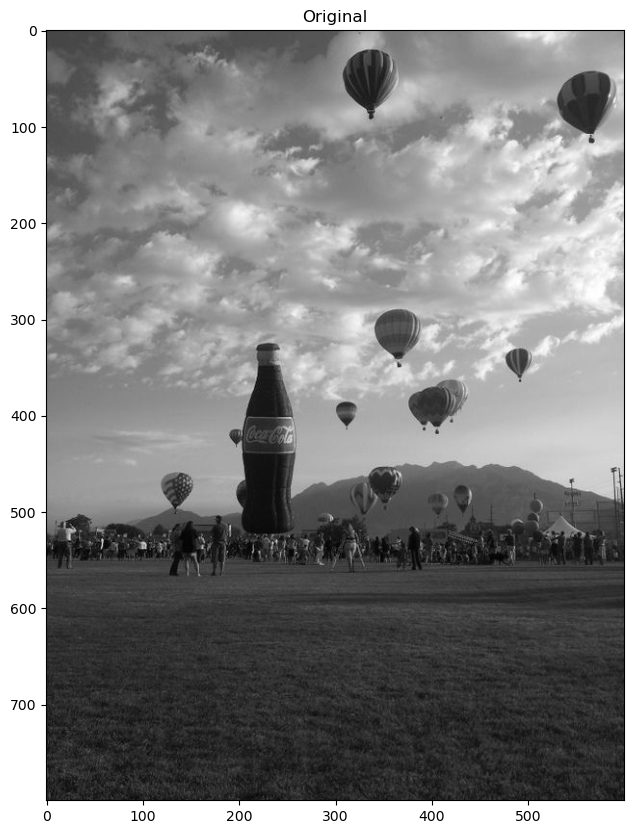

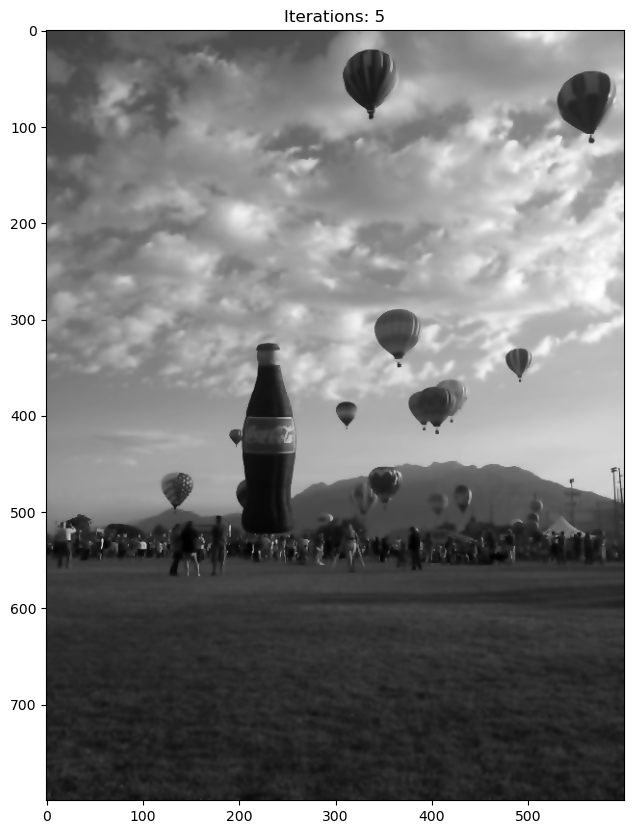

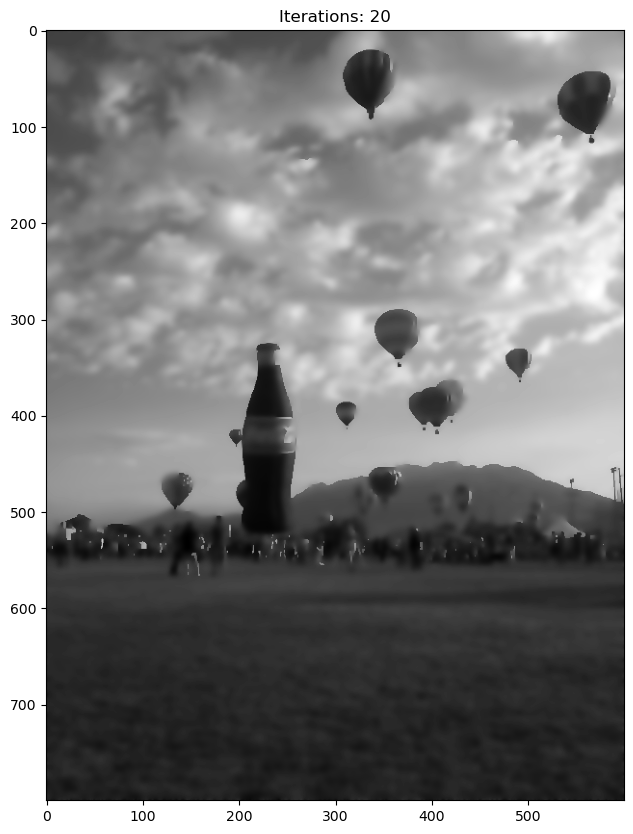

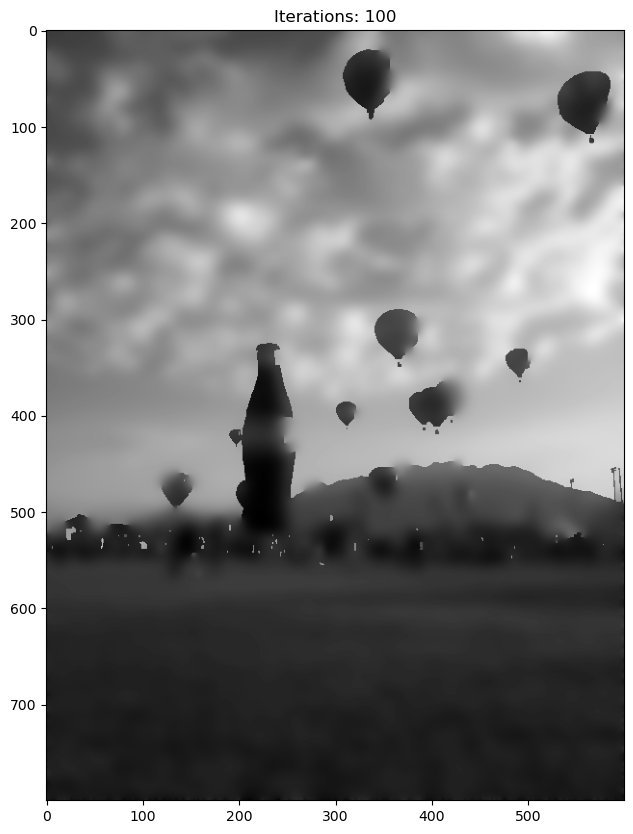

In [3]:
from matplotlib import cm, pyplot as plt
from imageio import imread

# To read in an image, convert it to grayscale, and rescale it.
picture = imread('coke_balloon.jpg', mode = 'L') * 1.0 / 255.0  # Ensure division is float

# To display the picture as grayscale
plt.imshow(picture, cmap=cm.gray)
plt.title('Original')
plt.show()

# Define constants and g function
sigma = 0.1
lambda_ = 0.25
N = [5,20,100]
g = lambda x: np.exp(-(x/sigma)**2)

# Iterate through different values of n
for n in N:
    anisdiff_bw(picture,n, lambda_, g)

# Problem 2

Complete the following function to process a colored image.
Run the function on balloons_color.jpg. Show the original image and the diffused image for
σ = .1, λ = .25, N = 5, 20, 100.

In [4]:
def anisdiff_color(U, N, lambda_, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g = e^{-x^2/sigma^2}
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    
    
    # Pad U
    Y_padded = np.pad(U, pad_width = ((1,1), (1,1), (0,0)))
    
    # Define the edges of the padded array
    Y_padded[0,1:-1, :] = U[0,:,:]
    Y_padded[-1,1:-1,:] = U[-1,:,:]
    Y_padded[1:-1,0,:] = U[:,0,:]
    Y_padded[1:-1,-1,:] = U[:,-1,:]
    
    
    # Run the diffusion equation N times
    for _ in range(N):
        Y_padded[1:-1,1:-1, :] += lambda_ * (
            g(np.sqrt(np.sum((Y_padded[:-2, 1:-1,:] - Y_padded[1:-1, 1:-1,:])**2, axis = 2, keepdims = True))) * (Y_padded[:-2, 1:-1,:] - Y_padded[1:-1, 1:-1,:]) +
            g(np.sqrt(np.sum((Y_padded[2:, 1:-1,:] - Y_padded[1:-1, 1:-1,:])**2, axis = 2, keepdims = True))) * (Y_padded[2:, 1:-1,:] - Y_padded[1:-1, 1:-1,:]) +
            g(np.sqrt(np.sum((Y_padded[1:-1, :-2,:] - Y_padded[1:-1, 1:-1,:])**2, axis = 2, keepdims = True))) * (Y_padded[1:-1, :-2,:] - Y_padded[1:-1, 1:-1,:]) +
            g(np.sqrt(np.sum((Y_padded[1:-1, 2:,:] - Y_padded[1:-1, 1:-1,:])**2, axis = 2, keepdims = True))) * (Y_padded[1:-1, 2:,:] - Y_padded[1:-1, 1:-1,:])
        )
    
    # Show blurred image
    plt.imshow(Y_padded[1:-1, 1:-1,:])
    plt.title(f'Iterations: {N}')
    plt.show()
    
    
    

/var/folders/td/8px6smg12fxf4nw_rf4snx840000gn/T/ipykernel_69594/1262262603.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  picture = imread('balloons_color.jpg') * 1./255


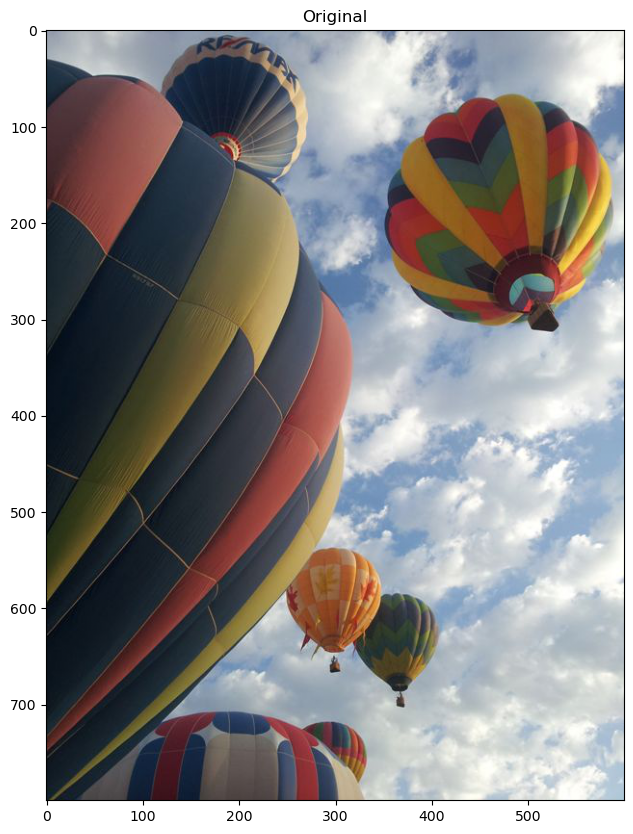

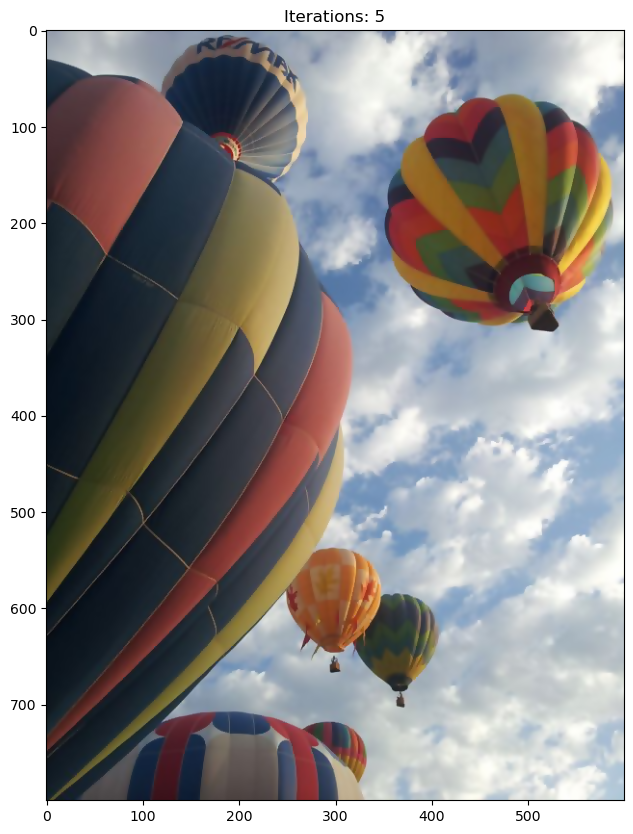

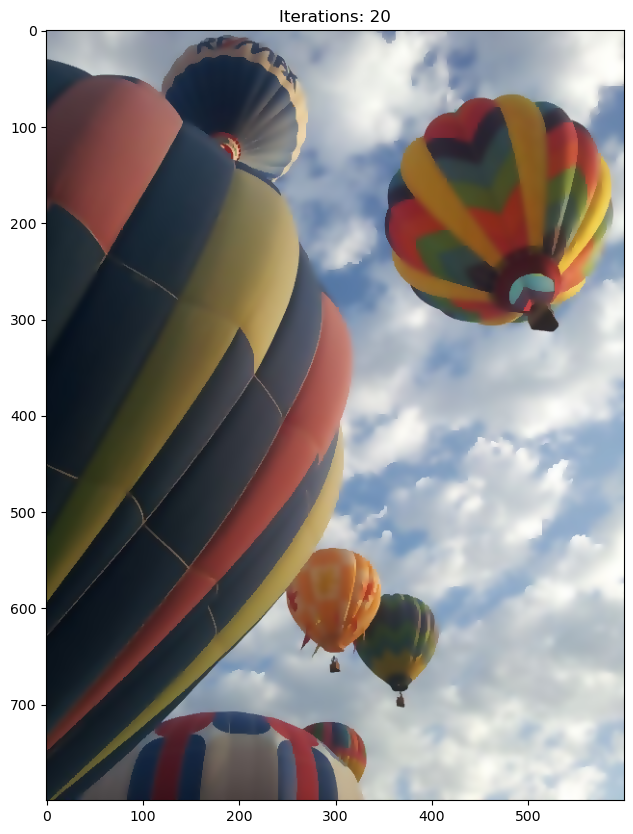

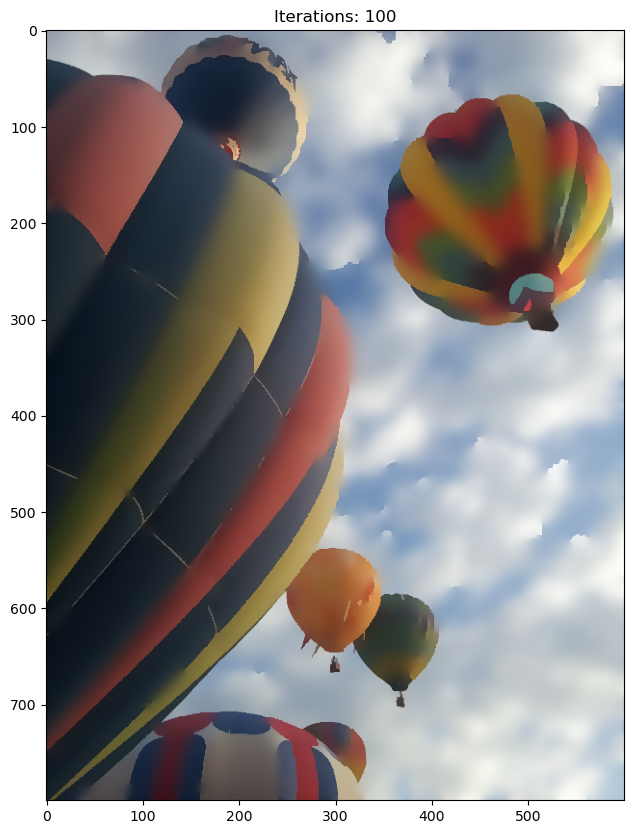

In [5]:
picture = imread('balloons_color.jpg') * 1./255

# Display original image
plt.imshow(picture)
plt.title('Original')
plt.show()

# Define constants and g function
sigma = 0.1
lambda_ = 0.25
N = [5,20,100]
g = lambda x: np.exp(-(x/sigma)**2)

# Iterate through different values of n
for n in N:
    anisdiff_color(picture, n, lambda_, g)

# Problem 3

Run anisdiff_bw() on the noisy image with σ = .1, λ = .25, N = 20. Display the
original image and the noisy image. Explain why anisotropic diffusion does not smooth out the
noise.

Use the following code to add noise to your grayscale image.

In [6]:
# Lab provided data
image = imread('coke_balloon.jpg', mode = 'L')*1./255
x, y = image.shape
for i in range(x*y//100):
    image[randint(x),randint(y)] = (127 + randint(127))*1./255

/var/folders/td/8px6smg12fxf4nw_rf4snx840000gn/T/ipykernel_69594/2729835131.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread('coke_balloon.jpg', mode = 'L')*1./255


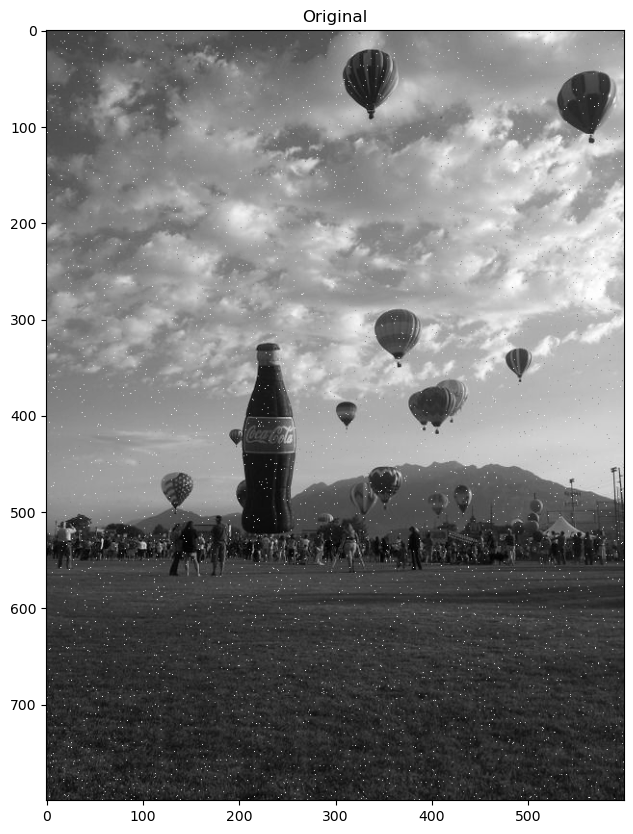

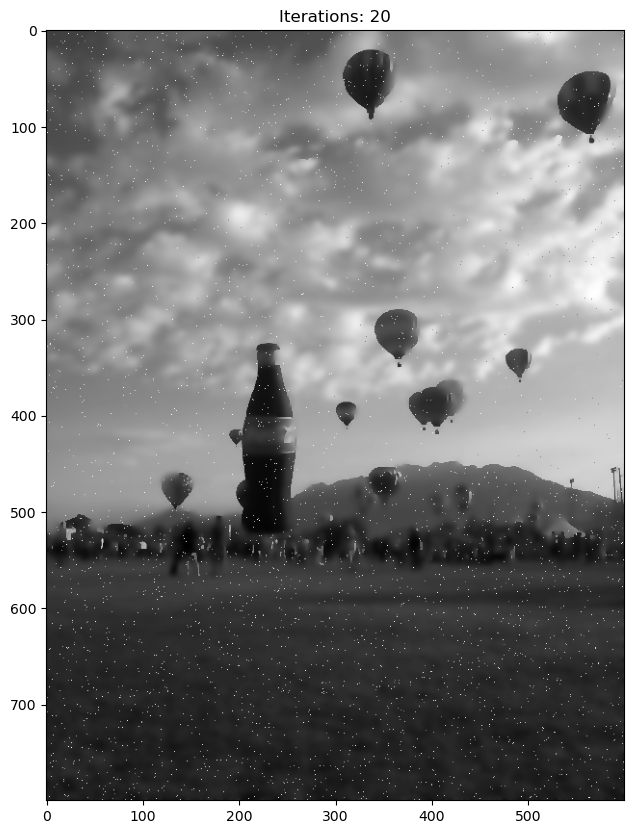

In [7]:
plt.imshow(image, cmap = cm.gray)
plt.title('Original')
plt.show()

sigma = 0.1
lambda_ = 0.25
N = 20
g = lambda x: np.exp(-(x/sigma)**2)

anisdiff_bw(image, N, lambda_, g)



The ansiotropic diffusion does not smooth out the noise because the noise makes artificial feature boundaries which ansiotropic diffusion purposely gets rid of.

# Problem 4

Implement the minimum-biased finite diverence scheme described above. Add noise to
balloons_color.jpg using the provided code below, and clean it using your implementation.
Show the original image, the noised image, and the cleaned image.

/var/folders/td/8px6smg12fxf4nw_rf4snx840000gn/T/ipykernel_69594/1740309279.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread('balloons_color.jpg') * 1./255
/var/folders/td/8px6smg12fxf4nw_rf4snx840000gn/T/ipykernel_69594/1740309279.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  noisy_img = imread('balloons_color.jpg') *1./255


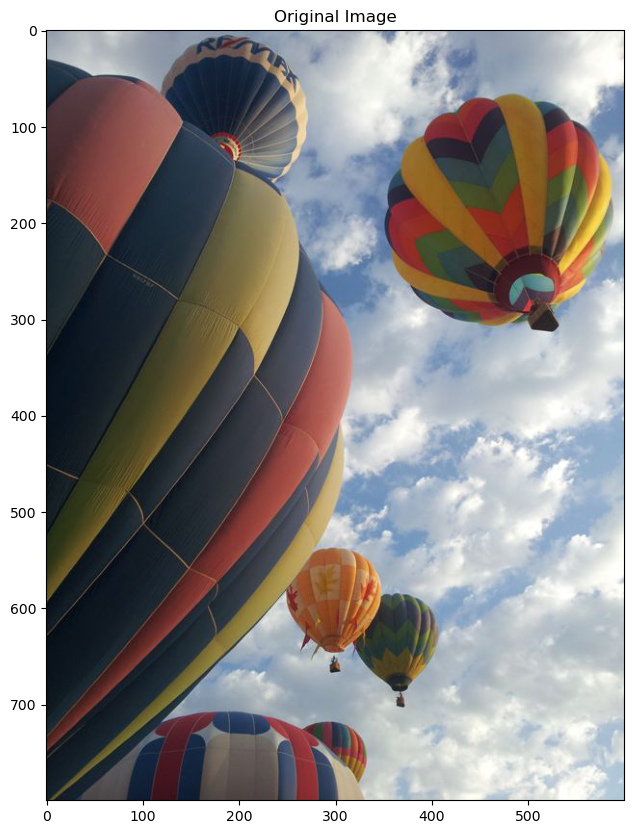

In [10]:
# Lab provided code
image = imread('balloons_color.jpg') * 1./255
noisy_img = imread('balloons_color.jpg') *1./255
x,y,z = image.shape
for dim in range(z):
    for i in range(x*y//30):
        # Assign a random value to a random place
        noisy_img[randint(x),randint(y),dim] = (127 + randint(127)) /255.
        
        
# Original Image      
plt.imshow(image)
plt.title('Original Image')
plt.show()

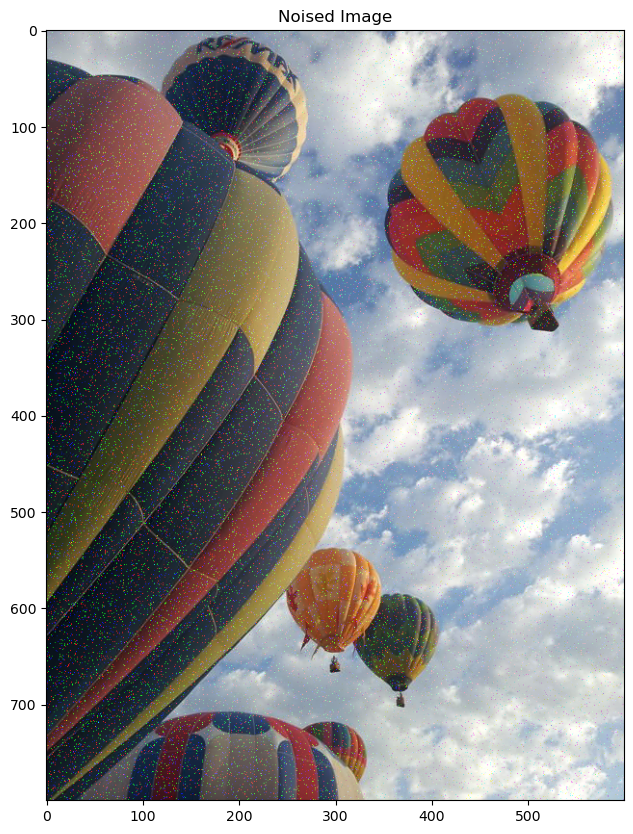

In [11]:
# Noised image
        
plt.imshow(noisy_img)
plt.title('Noised Image')
plt.show()

In [33]:
def minimum_bias(U, N, lambda_):
    
    l,n,colors = U.shape
    # Pad U
    Y_padded = np.pad(U, pad_width = ((1,1), (1,1), (0,0)))
    
    # Define the edges of the padded array
    Y_padded[0,1:-1, :] = U[0,:,:]
    Y_padded[-1,1:-1,:] = U[-1,:,:]
    Y_padded[1:-1,0,:] = U[:,0,:]
    Y_padded[1:-1,-1,:] = U[:,-1,:]
    
    diff_1 = np.reshape(np.sqrt(np.sum((Y_padded[:-2, 1:-1,:] - Y_padded[1:-1, 1:-1,:])**2, axis = 2, keepdims = True)), (1,l,n))
    diff_2 = np.reshape(np.sqrt(np.sum((Y_padded[2:, 1:-1,:] - Y_padded[1:-1, 1:-1,:])**2, axis = 2, keepdims = True)), (1,l,n))
    diff_3 = np.reshape(np.sqrt(np.sum((Y_padded[1:-1, :-2,:] - Y_padded[1:-1, 1:-1,:])**2, axis = 2, keepdims = True)), (1,l,n))
    diff_4 = np.reshape(np.sqrt(np.sum((Y_padded[1:-1, 2:,:] - Y_padded[1:-1, 1:-1,:])**2, axis = 2, keepdims = True)), (1,l,n))
    
    # Find the bias terms and get minimum and second to minimum                      
    bias = np.concatenate((diff_1, diff_2, diff_3, diff_4), axis = 0)
    min, pen_min = np.sort(bias, axis = 0)[0, :, :],np.sort(bias, axis = 0)[1, :, :]
    
    # Create g function
    g = (min + pen_min)/2
    g = np.array(g[:,:, np.newaxis])
    
    # Run the diffusion equation N times
    for _ in range(N):
        Y_padded[1:-1,1:-1,:] += lambda_ * g *(
            Y_padded[:-2, 1:-1, :] +
            Y_padded[2:, 1:-1, :] +
            Y_padded[1:-1, :-2, :] +
            Y_padded[1:-1, 2:, :] -
            4 * Y_padded[1:-1,1:-1,:]
        )
    
    # Show blurred image 
    plt.imshow(Y_padded[1:-1, 1:-1,:])
    plt.title(f'Iterations: {N}')
    plt.show()    


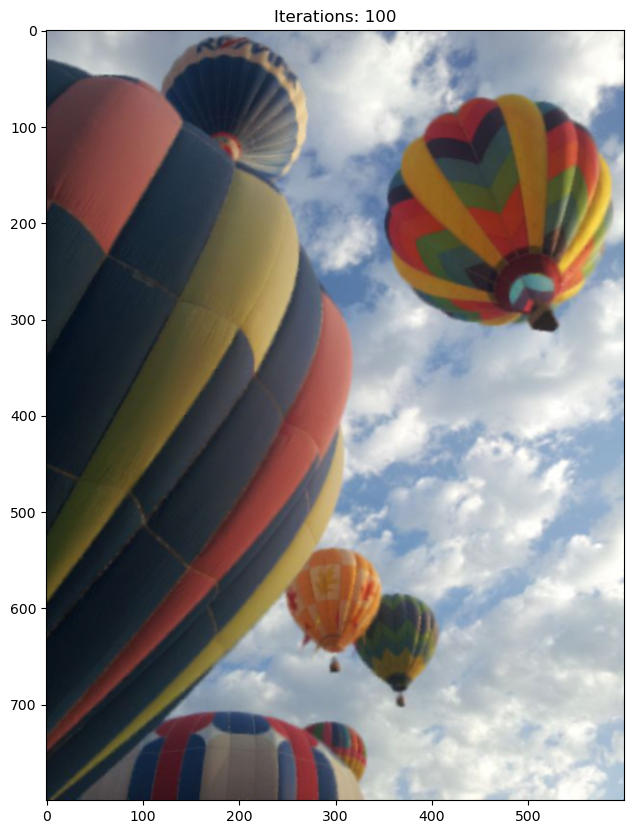

In [34]:
# Define constants and g function
lambda_ = 0.25
N = 100

# Run minimum bias function
minimum_bias(noisy_img, N, lambda_)